## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!git clone https://github.com/parth1620/Project-NST.git

## Task 2 : Loading VGG Pretrained Model

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg) # arch of the VGG

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
#freze the model. There is no training
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
#move model to gpu
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

We loaded the model to gpu.

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
#preprocessing
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):
  image = Image.open(img_path).convert("RGB")
  if max(image.size) > max_size:
    size = max_size  
  else:
    size = max(image.size)


  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(), #(224,224,3)--->(3,224,224)
      T.Normalize(mean=[0.485,0.456,0.406],
                  std=[0.229, 0.224, 0.225])
  ])
  image = img_transforms(image)
  image = image.unsqueeze(0) #(3,334,224)-->(1,3,224,224)
  return image

In [ ]:
content_p = preprocess('/content/dhoni.jpg')
style_p = preprocess("/content/art.jpg")

content_p = content_p.to(device)
style_p = style_p.to(device)


print("content shape", content_p.shape)
print("Style shape", style_p.shape)


content shape torch.Size([1, 3, 500, 807])
Style shape torch.Size([1, 3, 500, 676])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 4 : Deprocess image

In [ ]:
#load the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt


def deprocess(tensor):

  image = tensor.to('cpu').clone()#to copy
  image = image .numpy()
  image = image.squeeze(0)
  image = image.transpose(1,2,0) #(3,224,224)-->(224,224,3)
  image = image*np.array([0.229,0.224,0.225])+np.array([0.485, 0.456, 0.486])
  image = image.clip(0,1)

  return image

In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)  

print("Deprocess content:", content_d.shape)
print("Deprocess style:", style_d.shape)

Deprocess content: (500, 807, 3)
Deprocess style: (500, 676, 3)


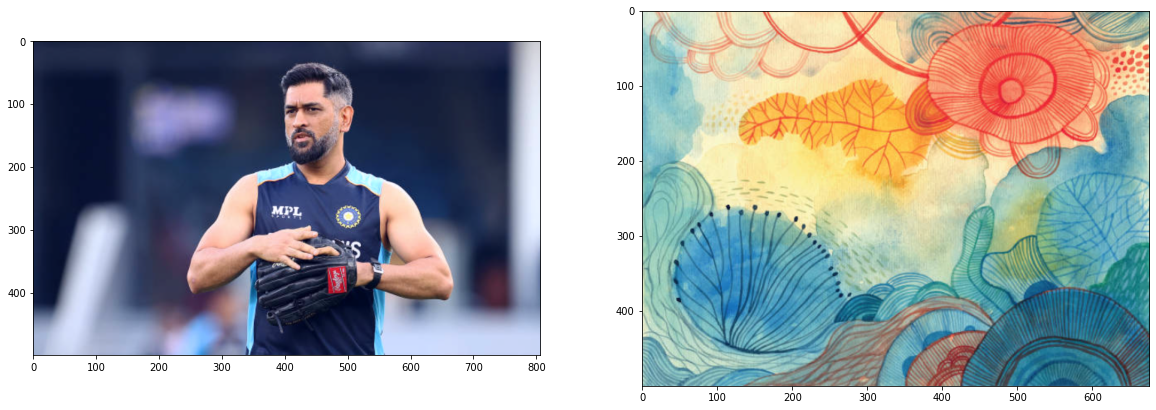

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [ ]:
#extract style and content features
def get_features(image, model):

  layers = {
      
      '0':'conv1_1',
      '5':'conv2_1',
      '10':'conv3_1',
      "19":'conv4_1',
      '21':'conv4_2', #content_feature
      '28':'conv5_1'
  }
  x = image 

  Features = {}

  for name, layer in model._modules.items():

    x = layer(x)

    if name in layers:
      Features[layers[name]] = x
  
  return Features

In [ ]:
content_f = get_features(content_p,vgg)
style_f = get_features(style_p,vgg)

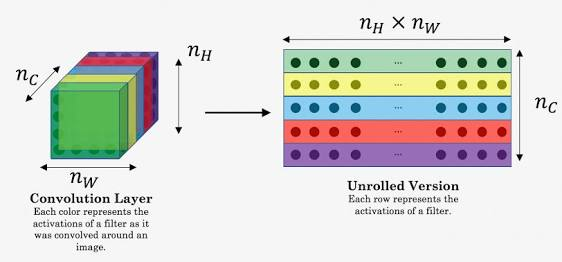

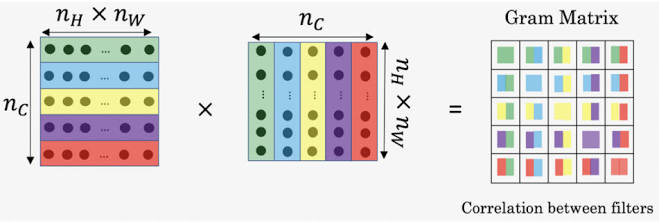

In [ ]:
#Gram matrix
def gram_matrix(tensor):
  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [ ]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f} 


## Task 6 : Creating Style and Content loss function

In [ ]:
#content and style loss
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {
    'conv1_1': 1.0,
    'conv2_1':0.75,
    'conv3_1':0.2,
    'conv4_1':0.2,
    'conv5_1':0.2
}

In [ ]:
def style_loss(style_weights, target_features,style_grams):
  loss =0 
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram =gram_matrix(target_f)
    style_gram =style_grams[layer]
    b,c,h,w = target_f.shape  
    layer_loss = style_weights[layer] * torch.mean((target_gram-style_gram)**2)
    loss += layer_loss/(c*h*w)

    return loss 

In [ ]:
#target with content image
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target,vgg)
print("Content Loss: ", content_loss(target_f['conv4_2'],content_f['conv4_2']))
print("style Loss: ", style_loss(style_weights, target_f,style_grams))

Content Loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style Loss:  tensor(116.5743, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [ ]:
#Training the style Transfer
from torch import optim  

optimizer = optim.Adam([target], lr=0.0003)

alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

In [ ]:
#training
def total_loss(c_loss,s_loss,alpha,beta):
  loss = alpha*c_loss+beta*s_loss
  return loss

In [ ]:
results = []

for i in range(epochs):
  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f,style_grams)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print(f"Total Loss at Epoch {i} is {t_loss}")
    results.append(deprocess(target.detach()))


Total Loss at Epoch 0 is 11657430.0
Total Loss at Epoch 500 is 6189185.0
Total Loss at Epoch 1000 is 4217370.0
Total Loss at Epoch 1500 is 3095660.0
Total Loss at Epoch 2000 is 2251942.75
Total Loss at Epoch 2500 is 1645135.75


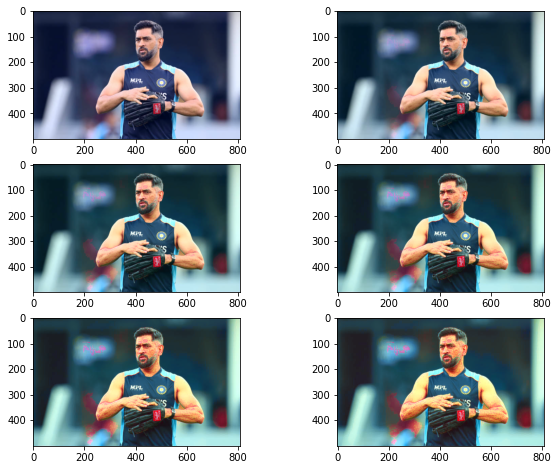

In [ ]:
#plotting
plt.figure(figsize= (10,8))

for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

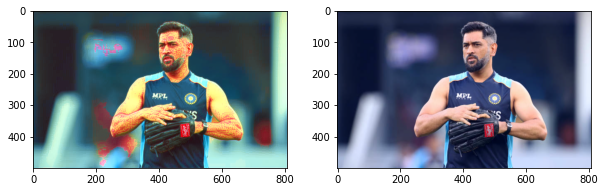

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1,ax2) =plt.subplots(1,2,figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)